<a href="https://colab.research.google.com/github/ahmer-talal/Neural-Networks/blob/main/ANN_TensorFlow_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## After understanding the core concepts of Neural Networks, now applying them practically using the MNIST built-in dataset.

# Libraries import

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt


**Loading MNIST Dataset**

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
print(X_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)


(60000, 28, 28)
(60000,)


**Normalize Data**

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0


**ANM Model**

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile Model**

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


**Model Training**

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8676 - loss: 0.4665 - val_accuracy: 0.9620 - val_loss: 0.1266
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9621 - loss: 0.1292 - val_accuracy: 0.9708 - val_loss: 0.0977
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9758 - loss: 0.0839 - val_accuracy: 0.9737 - val_loss: 0.0871
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0625 - val_accuracy: 0.9753 - val_loss: 0.0813
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0444 - val_accuracy: 0.9768 - val_loss: 0.0810
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9793 - val_loss: 0.0745
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0260 - val_accuracy: 0.9757 - val_loss: 0.0810
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0226 - 

**Testing Accuracy**

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0932
Test Accuracy: 0.9789999723434448


**Prediction & Visuals**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

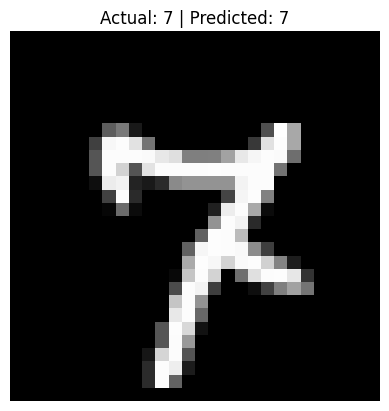

In [19]:
prediction = model.predict(X_test[index:index+1])
predicted_label = prediction.argmax()

plt.imshow(X_test[index], cmap='gray')
plt.title(f"Actual: {y_test[index]} | Predicted: {predicted_label}")
plt.axis('off')


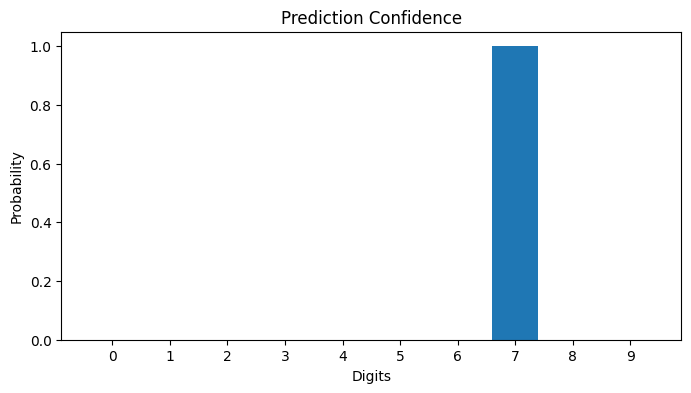

In [20]:
plt.figure(figsize=(8,4))
plt.bar(range(10), prediction[0])
plt.xlabel("Digits")
plt.ylabel("Probability")
plt.title("Prediction Confidence")
plt.xticks(range(10))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


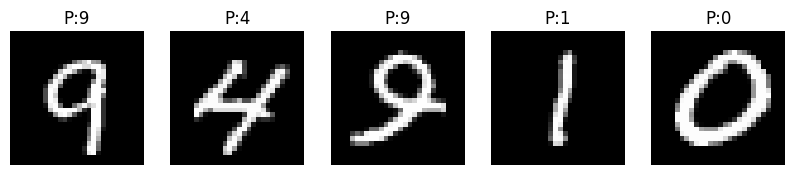

In [21]:
plt.figure(figsize=(10,5))

for i in range(5):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(1,5,i+1)

    pred = model.predict(X_test[idx:idx+1]).argmax()
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"P:{pred}")
    plt.axis('off')

plt.show()


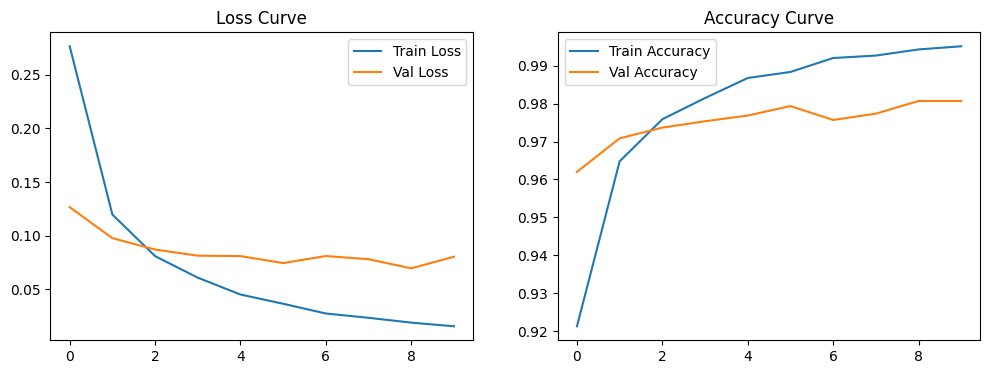

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


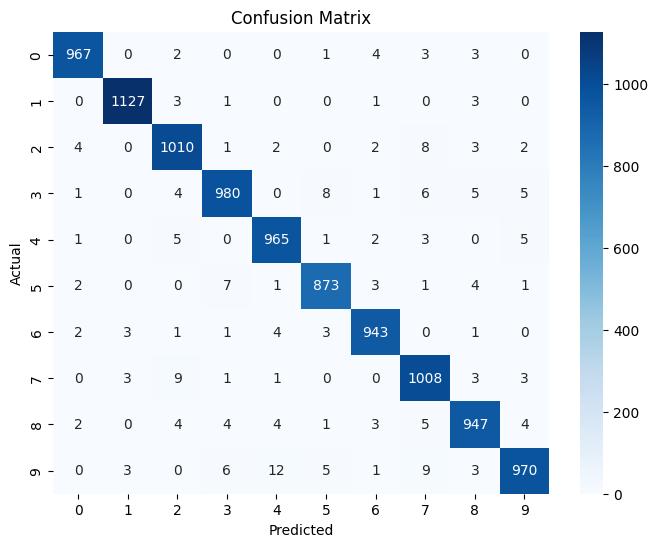

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
